In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:

# 1. Import CSV Files
# Load datasets from local system
customer_df = pd.read_csv(r"C:\Users\shett\Downloads\NAGA\Large_Customers_Dataset.csv")
transaction_df = pd.read_csv(r"C:\Users\shett\Downloads\NAGA\Large_Transactions_Dataset.csv")
support_df = pd.read_csv(r"C:\Users\shett\Downloads\NAGA\Large_Support_Tickets_Dataset.csv")


In [ ]:
# 2. Data Cleaning and Preparation
# Handling missing values (Simulated by inserting NaN)
customer_df.loc[:, 'Phone'] = customer_df['Phone'].fillna("Unknown")
transaction_df.loc[:, 'Amount'] = transaction_df['Amount'].fillna(transaction_df['Amount'].median())

# Remove duplicates
customer_df = customer_df.drop_duplicates()
transaction_df = transaction_df.drop_duplicates()
support_df = support_df.drop_duplicates()

In [ ]:
# 3. Data Integration
# Merging datasets
merged_df = pd.merge(customer_df, transaction_df, on='CustomerID', how='outer')
final_df = pd.merge(merged_df, support_df, on='CustomerID', how='outer')


In [ ]:
# 4. Feature Engineering
# Scaling Amount and Resolution Time
scaler = StandardScaler()
if 'Amount' in final_df.columns:
    final_df['Amount_Scaled'] = scaler.fit_transform(final_df[['Amount']].fillna(0))
else:
    final_df['Amount_Scaled'] = 0

# Dimensionality Reduction using PCA
if 'ResolutionTime' in final_df.columns:
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(final_df[['Amount_Scaled', 'ResolutionTime']].fillna(0))
    final_df['PCA_1'] = pca_features[:, 0]
    final_df['PCA_2'] = pca_features[:, 1]
else:
    final_df['PCA_1'] = 0
    final_df['PCA_2'] = 0

In [ ]:
# 5. Data Type Conversion for Correlation Analysis
# Ensure only numeric columns are used for correlation analysis
numeric_cols = final_df.select_dtypes(include=['float64', 'int64']).columns
if numeric_cols.any():
    final_numeric_df = final_df[numeric_cols].copy()
else:
    final_numeric_df = pd.DataFrame()

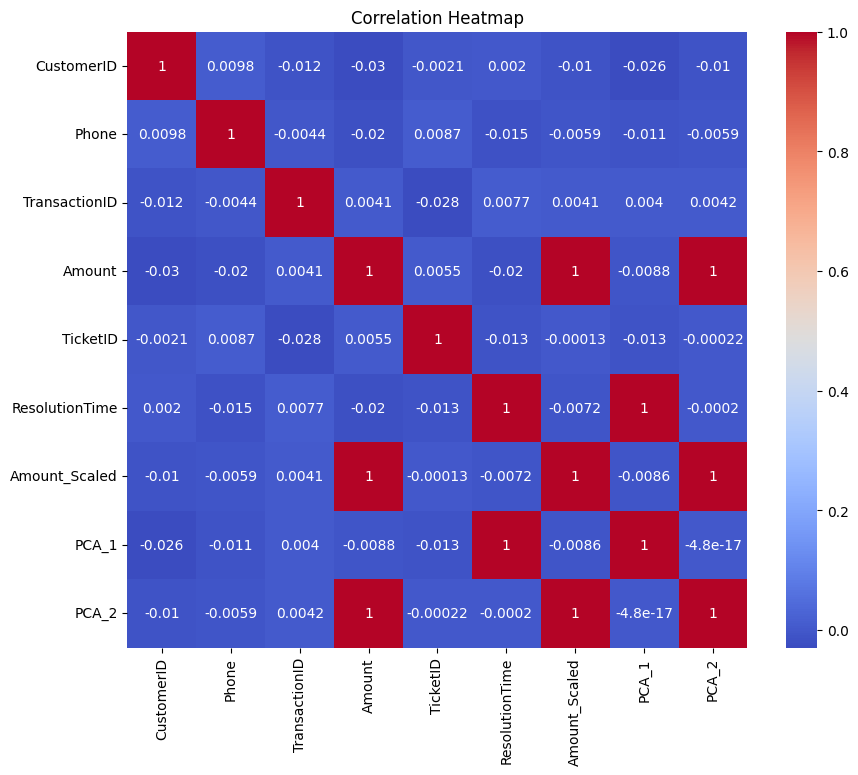

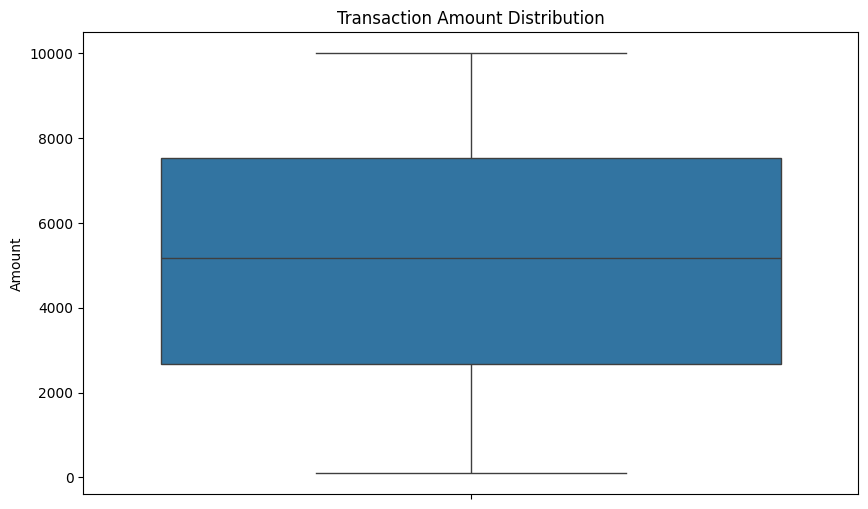

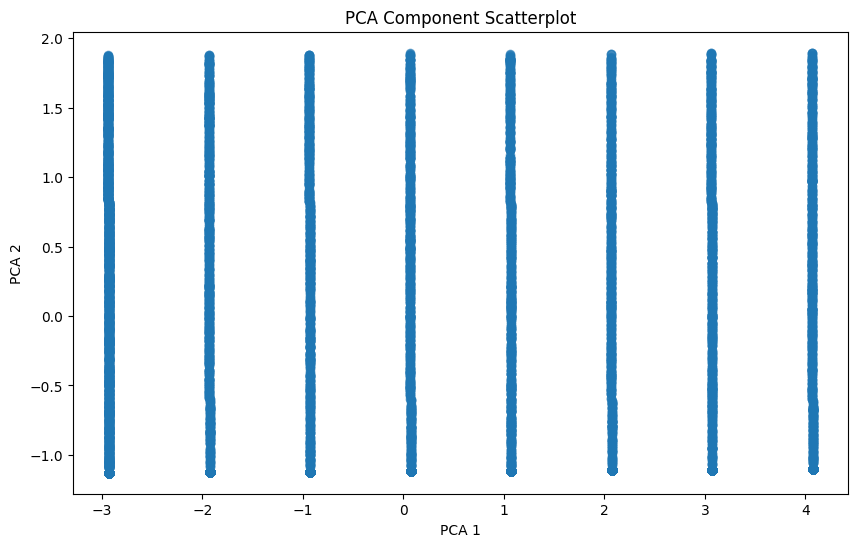

Integrated dataset saved as 'Integrated_Dataset.csv'.


In [ ]:
# 6. Data Visualization
# Correlation Heatmap
if not final_numeric_df.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(final_numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric data available for correlation heatmap.")

# Distribution of Transaction Amount
if 'Amount' in final_df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(final_df['Amount'])
    plt.title("Transaction Amount Distribution")
    plt.show()
else:
    print("Transaction Amount column not found.")

# Scatterplot of PCA Components
if 'PCA_1' in final_df.columns and 'PCA_2' in final_df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(final_df['PCA_1'], final_df['PCA_2'], alpha=0.6)
    plt.title("PCA Component Scatterplot")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()
else:
    print("PCA components not available for scatterplot.")

# Save final integrated dataset
final_df.to_csv("Integrated_Dataset.csv", index=False)
print("Integrated dataset saved as 'Integrated_Dataset.csv'.")


In [ ]:
from sklearn.impute import KNNImputer
# Apply KNN Imputer
data_imputer = KNNImputer(n_neighbors=5)
data_cleaned = pd.DataFrame(data_imputer.fit_transform(data), columns=data.columns)
# Check for missing values
print("Missing Values After Imputation:")
print(data_cleaned.isnull().sum())

NameError: name 'data' is not defined